# 6 Estimation for ARMA Models

The goal of this chapter is to estimate the ARMA($p$, $q$) model for an observed time series $x_1, \ldots, x_n$.

More specifically, we need to:

- Determine $p$ and $q$ (i.e., order selection),
- Estimate all the unknown parameters, including:
  - The process mean,
  - Coefficients $\phi_j$ and/or $\theta_j$,
  - White noise variance $\sigma^2$.

---

## 6.1 The Yule-Walker Equations and Parameter Estimation for Autoregressive Processes

Let $\{X_t\}$ be the zero-mean causal autoregressive process:

$$
X_t - \phi_1 X_{t-1} - \cdots - \phi_p X_{t-p} = W_t, \quad \{W_t\} \sim WN(0, \sigma^2)
\tag{6.1}
$$

Our aim is to find estimators of the coefficient vector:

$$
\phi = (\phi_1, \ldots, \phi_p)^T
$$

and the white noise variance $\sigma^2$ based on the observations $X_1, \ldots, X_n$, where $n > p$.

The causality assumption allows us to write $X_t$ in the form:

$$
X_t = \sum_{h=0}^{\infty} \psi_h W_{t-h}
$$

where:

$$
\psi(z) = \sum_{h=0}^{\infty} \psi_h z^h = \frac{1}{\phi(z)}, \quad |z| \leq 1
$$

Now multiply each side of (6.1) by $X_{t-j}$, for $j = 0, \ldots, p$, and take expectations:

$$
E(X_{t-j} X_t - \phi_1 X_{t-j} X_{t-1} - \cdots - \phi_p X_{t-j} X_{t-p}) = E(X_{t-j} W_t)
$$

Using the MA($\infty$) representation:

$$
E(X_{t-j} W_t) = E\left( \sum_{h=0}^{\infty} \psi_h W_{t-j-h} W_t \right) = \sum_{h=0}^{\infty} \psi_h E\{W_{t-j-h} W_t\}
$$

Since $\{W_t\} \sim WN(0, \sigma^2)$, we have:

$$
E(X_{t-j} W_t) = \sigma^2 I(j = 0), \quad \text{since } \psi_0 = 1
$$

This leads to the **Yule-Walker equations**:

$$
\begin{aligned}
\gamma_X(0) - \phi_1 \gamma_X(1) - \cdots - \phi_p \gamma_X(p) &= \sigma^2 \\
\gamma_X(1) - \phi_1 \gamma_X(0) - \cdots - \phi_p \gamma_X(p-1) &= 0 \\
\vdots \\
\gamma_X(p) - \phi_1 \gamma_X(p-1) - \cdots - \phi_p \gamma_X(0) &= 0
\end{aligned}
$$


Now, we obtain the Yule-Walker equations:

$$
\Gamma_p \phi = \gamma_p \tag{6.2}
$$

and

$$
\sigma^2 = \gamma_X(0) - \phi^T \gamma_p \tag{6.3}
$$

where $\Gamma_p = [\gamma_X(i - j)]_{i,j=1}^p$, $\phi = (\phi_1, \ldots, \phi_p)^T$ and $\gamma_p = (\gamma_X(1), \ldots, \gamma_X(p))^T$.

Recall that, in Section 2.6.2, we have proposed the estimator of $\gamma_X$ and proved that the estimator $\hat{\gamma}_X$ is nonnegative definite.

Using that, we have our so-called Yule-Walker estimator $\hat{\phi}$ and $\hat{\sigma}^2$:

$$
\hat{\Gamma}_p \hat{\phi} = \hat{\gamma}_p \tag{6.4}
$$

$$
\hat{\sigma}^2 = \hat{\gamma}_X(0) - \hat{\phi}^T \hat{\gamma}_p \tag{6.5}
$$

Noting that we have:

$$
\hat{\gamma}_X(h) =
\begin{cases}
\frac{1}{n} \sum_{t=1}^{n - |h|} (X_{t+|h|} - \bar{X}_n)(X_t - \bar{X}_n), & \text{if } |h| < n \\
0, & \text{if } |h| \geq n
\end{cases}
$$

Based on Lemma 2.3, we know that $\hat{\gamma}_X$ is nonnegative definite. Thus, $\hat{\gamma}_X(\cdot)$ is the autocovariance function of some stationary process based on Theorem 2.3, i.e.,

> "A real-valued function defined on the integers is the autocovariance function of a stationary time series if and only if it is even and non-negative definite."

According to Proposition 2.1:

> "If $\{X_t\}$ is a stationary $q$-correlated time series (i.e., $\text{Cov}(X_s, X_t) = 0$ whenever $|s - t| > q$) with mean 0, then it can be represented as an MA(q) process."

this stationary process must be an MA($n - 1$) process.

Finally, based on Proposition 5.1:

> "For a stationary process, if $\gamma_X(0) > 0$ and $\gamma_X(h) \to 0$ as $h \to \infty$, then the covariance matrix $\Gamma_n = [\gamma_X(i - j)]_{i,j=1}^n$ is positive definite for every $n$."

If $\hat{\gamma}_X(0) > 0$, then it can be shown that $\hat{\Gamma}_p$ is non-singular. Dividing by $\hat{\gamma}_X(0)$, we therefore obtain:

$$
\hat{\phi} = \hat{R}_p^{-1} \hat{\rho}_p \tag{6.6}
$$

$$
\hat{\sigma}^2 = \hat{\gamma}_X(0) \left( 1 - \hat{\rho}_p^T \hat{R}_p^{-1} \hat{\rho}_p \right) \tag{6.7}
$$

where $\hat{\rho}_p = (\hat{\rho}(1), \ldots, \hat{\rho}(p))^T = \hat{\gamma}_p / \hat{\gamma}_X(0)$ and $\hat{R}_p = \hat{\Gamma_p}/\hat{\phi}_X(0)$.

---

**Remark 6.1**: One feature of the Yule-Walker estimator is that the fitted model:

$$
X_t - \hat{\phi}_1 X_{t-1} - \cdots - \hat{\phi}_p X_{t-p} = W_t, \quad \{W_t\} \sim WN(0, \hat{\sigma}^2)
$$


...is also causal. And the fitted model’s ACVF is $\hat{\gamma}_X(h)$ for $h = 0, 1, \ldots, p$ (but in general different for higher lags).

---

### Theorem 6.1

If $\{X_t\}$ is the causal AR($p$) process with $\{W_t\} \sim \text{IID}(0, \sigma^2)$, then the Yule-Walker estimator $\hat{\phi}$ enjoys:

$$
\sqrt{n}(\hat{\phi} - \phi) \xrightarrow{d} \mathcal{N}(0, \sigma^2 \Gamma_p^{-1})
$$

and

$$
\hat{\sigma}^2 \xrightarrow{p} \sigma^2
$$

---

### Remark 6.2

Note that the Yule-Walker estimator is based on the **moment matching** method. Generally speaking, moment-based estimators can be far less efficient than the MLE. However, one good property of the Yule-Walker estimator is that it is **asymptotically equivalent** to the MLE.

---

### Remark 6.3

An approximate 95% confidence interval for $\phi_j$ is given by:

$$
\hat{\phi}_j \pm 1.96 \sqrt{\frac{v_{bjj}}{n}}
$$

where $v_{bjj}$ is the $j$-th diagonal element of $\hat{\sigma}^2 \hat{\Gamma}_p^{-1}$.

A 95% confidence region for $\phi$ is then:

$$
(\hat{\phi} - \phi)^T \hat{\Gamma}_p (\hat{\phi} - \phi) \leq \frac{\chi^2_{0.95}(p) \hat{\sigma}^2}{n}
$$

---

### Example 6.1

Here is a dataset: the number of sunspots observed each year between 1749 and 1963. The plot of the data is the following:

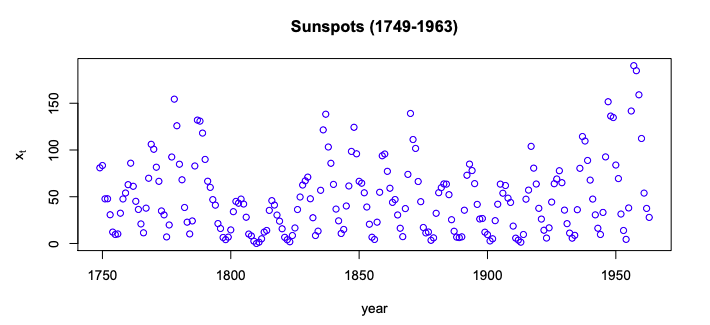

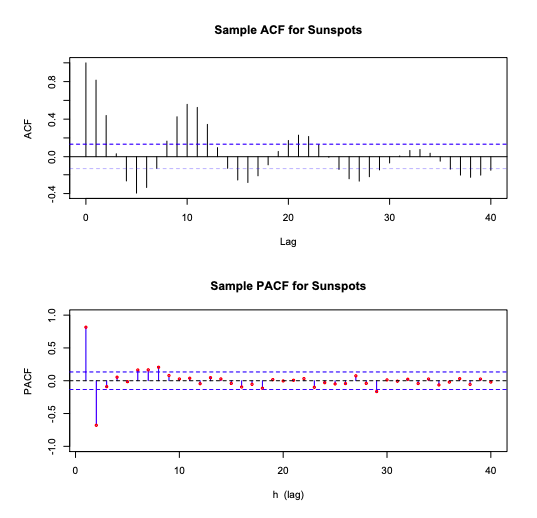

Fitting the series for AR($p$), where $p = 1, 2, 3, 4, 5, 6, 7, 8, 29$, we have:

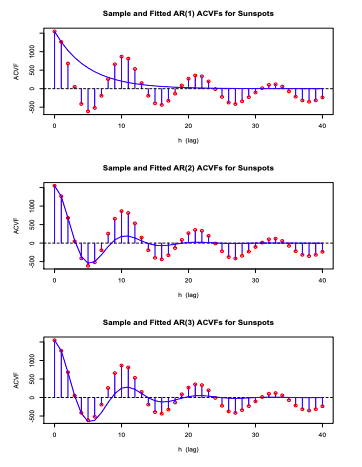

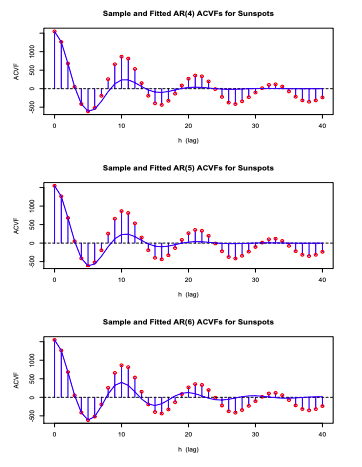

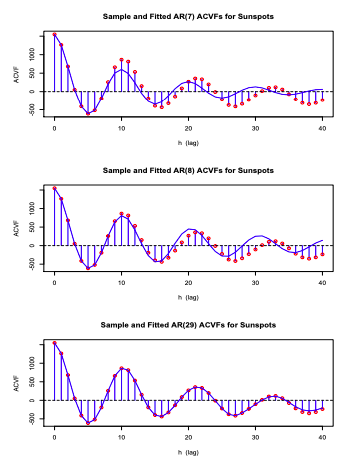

### Theorem 6.2

If $\{X_t\}$ is the causal AR($p$) process with $\{W_t\} \sim \text{IID}(0, \sigma^2)$ and if

$$
\hat{\phi}_m = (\phi_{m1}, \ldots, \phi_{mm})^T = \hat{R}_m^{-1} \hat{\rho}_m, \quad m > p,
$$

then

$$
\sqrt{n}(\hat{\phi}_m - \phi_m) \xrightarrow{d} \mathcal{N}(0, \sigma^2 \Gamma_m^{-1})
$$

where $\phi_m$ is the coefficient vector of the best linear predictor $\phi_m^T X_m$ of $X_{m+1}$ based on $X_m = (X_m, \ldots, X_1)^T$; i.e.,

$$
\phi_m = R_m^{-1} \rho_m.
$$

In particular, for $m > p$,

$$
\sqrt{n} \, \hat{\phi}_{mm} \xrightarrow{d} \mathcal{N}(0, 1).
$$

---

### Remark 6.4

When fitting AR models, the order $p$ will of course be unknown. If the true order is $p$, but we fit a model of order $m$, then we should expect the estimated coefficient vector

$$
\hat{\phi}_m = (\phi_{m1}, \ldots, \phi_{mm})^T
$$

to have a small value of $\hat{\phi}_{mm}$ for each $m > p$.

---

### Remark 6.5

Note that $\phi_{mm}$ is the **partial autocorrelation function (PACF)** of $\{X_t\}$ at lag $m$. Recall, PACF is a useful tool to identify AR series (while ACF is used for MA processes). If $m > p$, then $\phi_{mm} = 0$.

---

### Remark 6.6

For order selection of $p$, our textbook suggests setting $p$ to be the smallest $p_0$ such that:

$$
|\hat{\phi}_{mm}| < \frac{1.96}{\sqrt{n}}, \quad \text{for } p_0 < m \leq H,
$$

where $H$ is the maximum lag for which a reasonable estimator of $\gamma_X$ is available, i.e., $H \leq \frac{n}{4}$ and $n \geq 50$.

---

## 6.2 Preliminary Estimation for Autoregressive Processes Using the Durbin-Levinson Algorithm

Suppose we have observations $x_1, \ldots, x_n$ of a zero-mean stationary time series. Provided $\hat{\gamma}_X(0) > 0$, we can fit an autoregressive process of order $m < n$ to the data by means of the Yule-Walker equations.

The fitted AR($m$) process is:

$$
X_t - \hat{\phi}_{m1} X_{t-1} - \cdots - \hat{\phi}_{mm} X_{t-m} = W_t, \quad W_t \sim WN(0, \hat{\nu}_m) \tag{6.8}
$$

where:

$$
\hat{\phi}_m = (\phi_{m1}, \ldots, \phi_{mm})^T = \hat{R}_m^{-1} \hat{\rho}_m \tag{6.9}
$$

and

$$
\hat{\nu}_m = \hat{\gamma}_X(0) \left\{ 1 - \hat{\phi}_m^T \hat{R}_m^{-1} \hat{\phi}_m \right\} \tag{6.10}
$$

Based on Theorem 6.2, we know that $\hat{\phi}_m$ is the estimator of $\phi_m$, the coefficient vector of the best linear predictor $\phi_m^T X_m$ of $X_{m+1}$ based on $X_m = (X_m, \ldots, X_1)^T$. Furthermore, we can interpret $\hat{\nu}_m$ as an estimator of the corresponding **mean squared prediction error**.


This leads us to the following proposition.

---

### Proposition 6.1 (The Durbin-Levinson Algorithm for Fitting Autoregressive Models)

If $\hat{\gamma}_X(0) > 0$, then the fitted autoregressive model (6.8) for $m = 1, 2, \ldots, n - 1$ can be determined recursively from the following relations:

- Initialization:

$$
\hat{\phi}_{11} = \frac{\hat{\gamma}_X(1)}{\hat{\gamma}_X(0)}, \quad \hat{\nu}_0 = \hat{\gamma}_X(0)
$$

- Recursion for $m \geq 2$:

$$
\hat{\phi}_{mm} = \frac{
\hat{\gamma}_X(m) - \sum_{j=1}^{m-1} \hat{\phi}_{m-1,j} \hat{\gamma}_X(m - j)
}{
\hat{\nu}_{m-1}
}
$$

- Update the previous coefficients:

$$
\begin{pmatrix}
\hat{\phi}_{m1} \\
\vdots \\
\hat{\phi}_{m,m-1}
\end{pmatrix}
=
\begin{pmatrix}
\hat{\phi}_{m-1,1} \\
\vdots \\
\hat{\phi}_{m-1,m-1}
\end{pmatrix}
-
\hat{\phi}_{mm}
\begin{pmatrix}
\hat{\phi}_{m-1,m-1} \\
\vdots \\
\hat{\phi}_{m-1,1}
\end{pmatrix}
$$

- Update the variance:

$$
\hat{\nu}_m = \hat{\nu}_{m-1} \left(1 - \hat{\phi}_{mm}^2 \right)
$$

---

Again, note that $\hat{\phi}_{11}, \hat{\phi}_{22}, \ldots, \hat{\phi}_{mm}$ are the **sample partial autocorrelation function (PACF)** values at lags $1, 2, \ldots, m$.

Using the R function `acf()` with the option `type = "partial"` directly calculates the sample PACFs.


### Example 6.2

We generated a sequence of AR(2) series:

In [ ]:
# Set the seed for reproducibility
set.seed(720)

par(bg = "white")        

# Generate 5000 random normal values with mean = 0 and standard deviation = 1.5
w <- rnorm(5000, 0, 1.5)

# Apply a recursive filter with coefficients 0.5 and 0.2
x <- filter(w, filter = c(0.5, 0.2), method = "recursive")

# Remove the first 2000 values to reduce transient effects
x <- x[-(1:2000)]

# Compute and display the Partial Autocorrelation Function
pacf_result <- acf(x, type = "partial")

# Fit an autoregressive model using the Yule-Walker method (order selected automatically)
YW <- ar(x, method = "yule-walker")

# Display the full AR model summary
print(YW)

# Extract and print AR coefficients, prediction variance, and asymptotic variance-covariance matrix
cat("\nYule-Walker AR Coefficients (selected order):\n")
print(YW$ar)

cat("\nPrediction Variance:\n")
print(YW$var.pred)

cat("\nAsymptotic Variance-Covariance Matrix:\n")
print(YW$asy.var.coef)

# Fit a 3rd-order AR model manually (no AIC selection)
YW3 <- ar(x, method = "yule-walker", aic = FALSE, order.max = 3)

# Display the AR(3) coefficients and stats
cat("\n\nYule-Walker AR(3) Coefficients:\n")
print(YW3$ar)

cat("\nPrediction Variance (AR(3)):\n")
print(YW3$var.pred)

cat("\nAsymptotic Variance-Covariance Matrix (AR(3)):\n")
print(YW3$asy.var.coef)


## 6.3 Preliminary Estimation for Moving Average Processes Using the Innovations Algorithm

We know that we can fit autoregressive models of orders $1, 2, \ldots,$ to the data $x_1, \ldots, x_n$ by applying the Durbin-Levinson algorithm based on the sample autocovariances. Similarly, we can also fit moving average models,

$$
X_t = W_t + \hat{\theta}_{m1} W_{t-1} + \cdots + \hat{\theta}_{mm} W_{t-m}, \quad W_t \sim WN(0, \hat{\nu}_m),
$$

of orders $m = 1, 2, \ldots,$ by means of the innovations algorithm, where $\hat{\theta}_m = (\hat{\theta}_{m1}, \ldots, \hat{\theta}_{mm})^T$ and white noise variance $\hat{\nu}_m$, $m = 1, 2, \ldots,$ are specified as follows.

### (Innovation Estimates of Moving Average Parameters)

If $\hat{\gamma}_X(0) > 0$, we define the innovation estimates $\hat{\theta}_m$, $\hat{\nu}_m$ appearing above for $m = 1, \ldots, n-1$, by the recursion relations:

$$
\hat{\nu}_0 = \hat{\gamma}_X(0),
$$

$$
\hat{\theta}_{m,m-k} = \hat{\nu}_k^{-1} \left[
\hat{\gamma}_X(m-k) - \sum_{j=0}^{k-1} \hat{\theta}_{m,m-j} \hat{\theta}_{k,k-j} \hat{\nu}_j
\right], \quad k=0, \ldots, m-1,
$$

and

$$
\hat{\nu}_m = \hat{\gamma}_X(0) - \sum_{j=0}^{m-1} \hat{\theta}_{m,m-j}^2 \hat{\nu}_j.
$$

The asymptotic behavior can be proved more generally, not only for MA models (since for each observed sequence, we can calculate $\hat{\gamma}_X(h)$, and then use the above recursive means to find $\hat{\theta}_m$).

---

### Theorem 6.3 (The Asymptotic Behavior of $\hat{\theta}_m$)

Let $\{X_t\}$ be the causal invertible ARMA process

$$
\phi(B) X_t = \theta(B) W_t, \quad \{W_t\} \sim \text{IID}(0, \sigma^2), \quad E W_t^4 < \infty,
$$

and let

$$
\psi(z) = \sum_{j=0}^\infty \psi_j z^j = \frac{\theta(z)}{\phi(z)}, \quad |z| \leq 1,
$$

(with $\psi_0 = 1$, and $\psi_j = 0$ for $j < 0$). Then for any sequence of positive integers $\{m(n) : n=1,2,\ldots\}$ such that $m < n$, $m \to \infty$ and $m = o(n^{1/3})$ as $n \to \infty$, we have for each $k$,

$$
\sqrt{n} \left( \hat{\theta}_{m1} - \psi_1, \hat{\theta}_{m2} - \psi_2, \ldots, \hat{\theta}_{mk} - \psi_k \right)^T \xrightarrow{d} N(0, A),
$$

where $A = [a_{ij}]_{i,j=1}^k$ and

$$
a_{ij} = \sum_{r=1}^{\min(i,j)} \psi_{i-r} \psi_{j-r}.
$$

Moreover,

$$
\hat{\nu}_m \xrightarrow{p} \sigma^2.
$$

---

### Remark 6.7

Difference between this approach and the one based on the Durbin-Levinson algorithm:

For an AR($p$) process, the Yule-Walker estimator $\hat{\phi}_p = (\hat{\phi}_{p1}, \ldots, \hat{\phi}_{pp})^T$ is consistent for $\phi_p$ as the sample size $n \to \infty$. However, for an MA($q$) process, the estimator $\hat{\theta}_q = (\hat{\theta}_{q1}, \ldots, \hat{\theta}_{qq})^T$ is **not consistent** for the true parameter vector $\theta_q$ as $n \to \infty$. For consistency, it is necessary to use the estimator $(\hat{\theta}_{m1}, \ldots, \hat{\theta}_{mq})^T$ with $\{m(n)\}$ satisfying the conditions of the above theorem.


### Example 6.3

Consider the MA process

$$
X_t = W_t - 1.5 W_{t-1} + 0.5 W_{t-2}, \quad W_t \sim N(0, 2).
$$

Run the following codes, we can see that


In [ ]:
# Set seed for reproducibility
set.seed(720)

# Generate 2000 normal random variables with mean=0 and variance=2
w <- rnorm(2000, 0, sqrt(2))

# Apply a one-sided moving average filter with coefficients 1, -1.5, 0.5
# 'sides=1' means filter uses only past and current values (causal filter)
v <- filter(w, filter = c(1, -1.5, 0.5), sides = 1)

# Keep only the last 500 filtered values to avoid startup effects
v <- tail(v, 500)

# Load itsmr package for iterative averaging function 'ia'
if (!requireNamespace("itsmr", quietly = TRUE)) {
  install.packages("itsmr")
}
library(itsmr)

# Define parameters for the iterative averaging
jj <- c(1:10, 10, 10, 10)  # values of 'j' for ia()
mm <- c(1:10, 20, 50, 100) # values of 'm' for ia()

# Loop over parameters and print the results of ia() on the filtered series 'v'
for(i in seq_along(jj)) {
  cat("Result for j =", jj[i], "and m =", mm[i], ":\n")
  print(ia(v, jj[i], mm[i]))
  cat("\n--------------------\n")
}


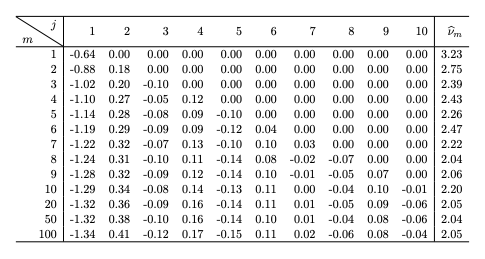

## 6.4 Preliminary Estimation for ARMA(p, q) Processes

Theorem 6.3 basically says that, for a causal invertible ARMA process 

$$
\phi(B) X_t = \theta(B) W_t,
$$ 

we can use the innovations algorithm to obtain $\hat{\theta}_{bm1}, \ldots, \hat{\theta}_{bmk}$, for each $k$, which are consistent estimators of $\psi_1, \ldots, \psi_k$, where 

$$
\psi(z) = \sum_{j=0}^\infty \psi_j z^j = \frac{\theta(z)}{\phi(z)}.
$$ 

What more can we do using these results? More specifically, since $\psi(z)$ comes from $\theta(z)$ and $\phi(z)$, can we use the estimator of $\psi(z)$ and go back to estimate $\theta(z)$ and $\phi(z)$?

Let $\{X_t\}$ be the zero-mean causal ARMA(p, q) process,

$$
X_t - \phi_1 X_{t-1} - \cdots - \phi_p X_{t-p} = W_t + \theta_1 W_{t-1} + \cdots + \theta_q W_{t-q}, \quad \{W_t\} \sim WN(0, \sigma^2).
$$

The causality assumption ensures that

$$
X_t = \sum_{j=0}^\infty \psi_j W_{t-j},
$$

Based on

$$
\sum_{j=0}^\infty \psi_j z^j = \frac{\theta(z)}{\phi(z)},
$$

we can match the coefficients as

$$
\phi_0 = 1
$$

and

$$
\psi_j = \theta_j + \sum_{i=1}^{\min(j,p)} \phi_i \psi_{j-i}, \quad j = 1, 2, \ldots,
$$

and by convention, $\theta_j = 0$ for $j > q$ and $\phi_j = 0$ for $j > p$. So when $j > p$, we actually have

$$
\psi_j = \sum_{i=1}^p \phi_i \psi_{j-i}, \quad j = q + 1, q + 2, \ldots, q + p.
$$

We know how to estimate $\psi_j$'s. Replacing them with their estimators, we have

$$
\hat{\theta}_{bmj} = \sum_{i=1}^p \phi_i \hat{\theta}_{b m, j-i}, \quad j = q + 1, q + 2, \ldots, q + p.
$$

Then, solving for $\phi_i$, we obtain the estimator $\hat{\phi}_1, \ldots, \hat{\phi}_p$ (natural questions: does the solution exist? If so, is it unique? Further, is the fitted ARMA process causal?). Then, the estimate of $\theta_1, \ldots, \theta_q$ is found easily from

$$
\hat{\theta}_{b j} = \hat{\theta}_{b m j} - \sum_{i=1}^{\min(j,p)} \hat{\phi}_i \hat{\theta}_{b m, j-i}, \quad j = 1, 2, \ldots, q.
$$

Finally, the white noise variance $\sigma^2$ is estimated by

$$
\hat{\sigma}^2 = \nu_{b m}.
$$


By the consistency of $\hat{\theta}_{bmj} \xrightarrow{p} \psi_j$, where $m = m(n)$ satisfying the condition in Theorem 6.3, we have

$$
\hat{\phi} \xrightarrow{p} \phi, \quad \hat{\theta} \xrightarrow{p} \theta, \quad \text{and} \quad \hat{\sigma}^2 \xrightarrow{p} \sigma^2
$$

as $n \to \infty$. However, the efficiency (asymptotic variance) of this moment-matching type estimator is somewhat poor. In the next section, we discuss a more efficient estimation procedure (strictly more efficient if $q \geq 1$) of $(\phi, \theta)$ based on maximization of the Gaussian likelihood. Noting that, when $q=0$, we have an AR process. And in the first section of this Chapter, we discussed that the Yule-Walker (based on moment-matching) estimator is as efficient as the MLE.

---

### 6.5 Recursive Calculation of the Likelihood of an Arbitrary Zero-Mean Gaussian Process

All the previously discussed methods are based on matching moments. This is a very natural thought, since for a general stationary time series, it is basically determined by its first moment (mean) and its second moments (ACVF). Can we gain more if we assume more assumptions about the sequence?

In this section, we assume $\{X_t\}$ to be a Gaussian process, more specifically, an arbitrary zero-mean Gaussian process. In the next section, we focus on Gaussian ARMA processes.

Let $\{X_t\}$ be a Gaussian process with mean zero and covariance function

$$
\kappa(i, j) = E(X_i X_j).
$$

Denoting

$$
X_n = (X_1, \ldots, X_n)^T
$$

and $\Gamma_n$ as the covariance matrix of $X_n$, i.e.,

$$
\Gamma_n = E(X_n X_n^T),
$$

which is assumed to be non-singular. Then, we have

$$
X_n \sim N(0, \Gamma_n).
$$

Then the likelihood of $X_n$ is

$$
L(\Gamma_n) = (2\pi)^{-n/2} (\det \Gamma_n)^{-1/2} \exp\left(-\frac{1}{2} X_n^T \Gamma_n^{-1} X_n \right).
$$

Evaluating $\det \Gamma_n$ and $\Gamma_n^{-1}$ can be avoided by using the one-step predictors and their mean squared errors.

Denote the one-step predictors of $X$ as

$$
\hat{X}_n = (\hat{X}_1, \ldots, \hat{X}_n)^T,
$$

where $\hat{X}_1 = 0$ and

$$
\hat{X}_j = E(X_j \mid X_1, \ldots, X_{j-1}), \quad j \geq 2,
$$

and

$$
\nu_{j-1} = E\big( (X_j - \hat{X}_j)^2 \big), \quad j = 1, \ldots, n.
$$

We know that, from the innovations algorithm,

$$
\hat{X}_{n+1} = \begin{cases}
0, & n=0, \\
\sum_{j=1}^n \theta_{nj} \big( X_{n+1 - j} - \hat{X}_{n+1 - j} \big), & n \geq 1,
\end{cases}
$$


Now define

$$
C = \begin{pmatrix}
1 & & & & & & & \\
\theta_{11} & 1 & & & & & & \\
\theta_{22} & \theta_{21} & 1 & & & & & \\
\vdots & \vdots & \vdots & \ddots & & & & \\
\vdots & \vdots & \vdots & & \ddots & & & \\
\vdots & \vdots & \vdots & & & \ddots & & \\
\theta_{n-1,n-1} & \theta_{n-1,n-2} & \cdots & \cdots & \cdots & \cdots & 1
\end{pmatrix}
$$

Then, we can write

$$
\hat{X}_n = (C - I)(X_n - \hat{X}_n),
$$

where $I$ is the $n$-dimensional identity matrix. Hence,

$$
X_n = (X_n - \hat{X}_n) + \hat{X}_n = C (X_n - \hat{X}_n).
$$

Noting that

$$
X_n - \hat{X}_n \sim N(0, D),
$$

where

$$
D = \operatorname{diag} \{\nu_0, \ldots, \nu_{n-1}\}.
$$

Thus,

$$
\Gamma_n = C D C^T.
$$

Further, we have

$$
X_n^T \Gamma_n^{-1} X_n = (X_n - \hat{X}_n)^T D^{-1} (X_n - \hat{X}_n) = \sum_{j=1}^n \frac{(X_j - \hat{X}_j)^2}{\nu_{j-1}},
$$

and

$$
\det \Gamma_n = \det C \times \det D \times \det C^T = \nu_0 \nu_1 \cdots \nu_{n-1}.
$$

Finally, we can rewrite the likelihood as

$$
L(\Gamma_n) = (2\pi)^{-\frac{n}{2}} (\nu_0 \cdots \nu_{n-1})^{-\frac{1}{2}} \exp\left\{ -\frac{1}{2} \sum_{j=1}^n \frac{(X_j - \hat{X}_j)^2}{\nu_{j-1}} \right\}.
$$


### 6.6 Maximum Likelihood Estimation for ARMA Processes

Using the MLE developed from the last section, suppose now we have a causal Gaussian ARMA$(p, q)$ process,

$$
\phi(B) X_t = \theta(B) W_t
$$

The one-step predictor is obtained through the Innovations algorithm; i.e.,

$$
\hat{X}_{b, i+1} = \sum_{j=1}^i \theta_{ij} (X_{i+1-j} - \hat{X}_{b, i+1-j}), \quad 1 \leq i < m = \max(p, q),
$$

and

$$
\hat{X}_{b, i+1} = \phi_1 X_{i+1 - 1} + \cdots + \phi_p X_{i+1 - p} + \sum_{j=1}^q \theta_{ij} (X_{i+1 - j} - \hat{X}_{b, i+1 - j}), \quad i \geq m,
$$

and

$$
E\big( X_{i+1} - \hat{X}_{b, i+1} \big)^2 = \sigma^2 r_i.
$$

Thus, the MLE can be derived as

$$
L(\phi, \theta, \sigma^2) = (2\pi \sigma^2)^{-\frac{n}{2}} (r_0 \cdots r_{n-1})^{-\frac{1}{2}} \exp \left[ -\frac{1}{2 \sigma^2} \sum_{j=1}^n \frac{(X_j - \hat{X}_{b,j})^2}{r_{j-1}} \right].
$$

Setting the first derivative of $\log L$ with respect to $\sigma^2$ to zero, we have

$$
\hat{\sigma}^2 = \frac{1}{n} S(\hat{\phi}, \hat{\theta}),
$$

where

$$
S(\hat{\phi}, \hat{\theta}) = \sum_{j=1}^n \frac{(X_j - \hat{X}_{b,j})^2}{r_{j-1}},
$$

and $\hat{\phi}, \hat{\theta}$ are the values of $\phi$ and $\theta$ which minimize

$$
l(\phi, \theta) = \log \left( \frac{1}{n} S(\phi, \theta) \right) + \frac{1}{n} \sum_{j=1}^n \log r_{j-1}.
$$

This $l$ function is referred to as the **reduced likelihood**, which is a function of $\phi$ and $\theta$ only. Note that we start with the causal condition, so it is better to search for $\phi$ that makes the sequence causal. However, invertibility is not required, but you can also impose that.

An intuitively appealing alternative estimation procedure is to minimize the weighted sum of squares

$$
S(\phi, \theta) = \sum_{j=1}^n \frac{(X_j - \hat{X}_{b,j})^2}{r_{j-1}}
$$


We refer to the resulting estimator as the least squares estimator $\hat{\phi}$ and $\hat{\theta}$. Further, the least squares estimate of $\sigma^2$ is

$$
\hat{\sigma}^2 = \frac{S(\hat{\phi}, \hat{\theta})}{n - p - q}.
$$

### 6.7 Asymptotic properties of the MLE

Denote

$$
\hat{\beta} = \begin{pmatrix} \hat{\phi}^T \\ \hat{\theta}^T \end{pmatrix}.
$$

If ${W_t} \sim \text{i.i.d. } N(0, \sigma^2)$ and ${X_t}$ is causal and invertible, then

$$
\sqrt{n}(\hat{\beta} - \beta) \xrightarrow{d} N(0, V(\beta)),
$$

where for $p \geq 1$ and $q \geq 1$,

$$
V(\beta) = \sigma^2 \left[
\begin{pmatrix}
E[U_t U_t^T] & E[U_t V_t^T] \\
E[V_t U_t^T] & E[V_t V_t^T]
\end{pmatrix}
\right]^{-1},
$$

with

$$
U_t = (U_t, \ldots, U_{t+1-p})^T, \quad V_t = (V_t, \ldots, V_{t+1-q})^T,
$$

and

$$
\phi(B) U_t = W_t, \quad \theta(B) V_t = W_t.
$$

---

### AICC Criterion

Choose $p, q, \hat{\phi}_p$ and $\hat{\theta}_q$ to minimize

$$
\mathrm{AICC} = -2 \log L \left( \hat{\phi}_p, \hat{\theta}_q, \frac{S(\hat{\phi}_p, \hat{\theta}_q)}{n} \right) + \frac{2 (p + q + 1) n}{n - p - q - 2}.
$$

---

### 6.8 Diagnostic checking

Given data ${X_1, \ldots, X_n}$, we fit an ARMA(p, q) model and obtain the MLE $\hat{\phi}, \hat{\theta}$, and $\hat{\sigma}^2$. The fitted process is

$$
\hat{\phi}(B) X_t = \hat{\theta}(B) W_t.
$$

Based on the fitted process, we calculate the one-step predictor of $X_t$ given $X_1, \ldots, X_{t-1}$, using the estimated parameters. Denote this predictor as

$$
\hat{X}_t(\hat{\phi}, \hat{\theta}), \quad t = 1, \ldots, n.
$$

The residuals are defined by

$$
W^c_t(\hat{\phi}, \hat{\theta}) = \frac{X_t - \hat{X}_t(\hat{\phi}, \hat{\theta})}{\sqrt{r_{t-1}(\hat{\phi}, \hat{\theta})}}, \quad t = 1, \ldots, n.
$$

If the fitted model is exactly correct, then ${W^c_t}$ should be white noise with variance $\hat{\sigma}^2$. However, this is rarely the case, and even if it were, we might not fully trust it. Nonetheless, the residuals $W^c_t$ should have properties that...


The residuals $W^c_t(\phi, \theta)$ are similar to those of the white noise sequence

$$
W_t(\phi, \theta) = \frac{X_t - \hat{X}_t(\phi, \theta)}{\sqrt{r_{t-1}(\phi, \theta)}}, \quad t = 1, \ldots, n,
$$

which approximates the white noise term in the sense that

$$
E\left\{ W_t(\phi, \theta) - W_t \right\}^2 \to 0 \quad \text{as } t \to \infty.
$$

Consequently, the properties of the residuals $\{ W^c_t \}$ should reflect those of the white noise sequence $\{ W_t \}$ generating the underlying true process. In particular, the sequence $\{ W^c_t \}$ should be approximated as:

1. Uncorrelated if $W_t \sim WN(0, \sigma^2)$,
2. Independent if $\{W_t\} \sim \text{i.i.d. } (0, \sigma^2)$,
3. Normally distributed if $W_t \sim N(0, \sigma^2)$.

